# Support Vector Machines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.2)

### Based on https://github.com/adashofdata

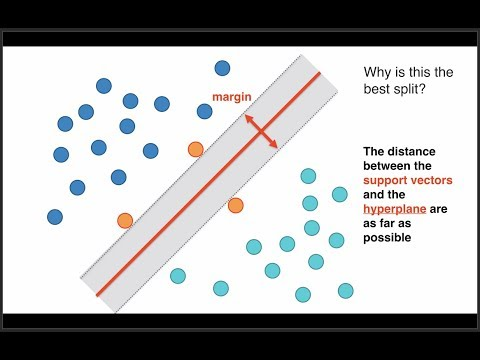

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('N1vOgolbjSc')


In [4]:
df = pd.read_csv('recipes_muffins_cupcakes.csv')
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


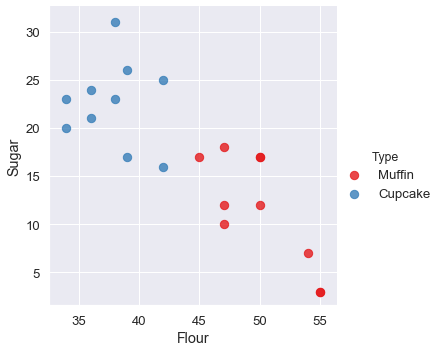

In [5]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=df, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [6]:
# Create the X and Y variable
df['type_label'] = df['Type'].apply(lambda x: 0 if x == 'Muffin' else 1)
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,type_label
0,Muffin,55,28,3,7,5,2,0,0,0
1,Muffin,47,24,12,6,9,1,0,0,0
2,Muffin,47,23,18,6,4,1,0,0,0
3,Muffin,45,11,17,17,8,1,0,0,0
4,Muffin,50,25,12,6,5,2,1,0,0
5,Muffin,55,27,3,7,5,2,1,0,0
6,Muffin,54,27,7,5,5,2,0,0,0
7,Muffin,47,26,10,10,4,1,0,0,0
8,Muffin,50,17,17,8,6,1,0,0,0
9,Muffin,50,17,17,11,4,1,0,0,0


In [7]:
# This is a small data set and we will just skip the Train/Test split and simply use the whole data set
# Now separate the features and target
X = df[['Flour', 'Sugar']].as_matrix()
X

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

In [8]:
Y = df['type_label'].as_matrix()
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [ ]:
sdf = df[['Flour', 'Sugar', 'type_label']]
sdf

In [ ]:
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [ ]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [ ]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [37]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


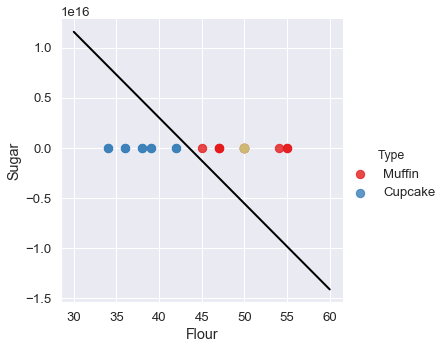

In [38]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

## Additional Resources

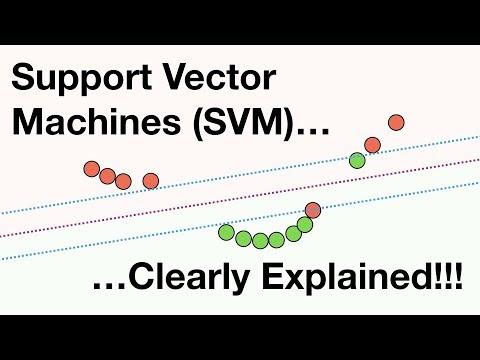

In [45]:
# StatQuest
YouTubeVideo('efR1C6CvhmE')

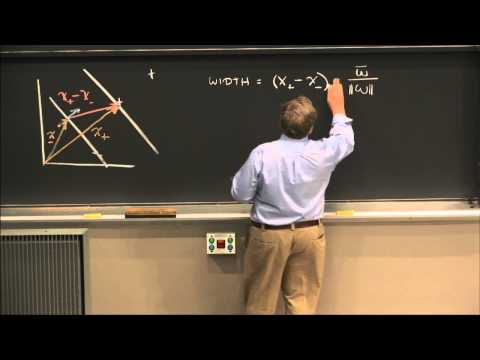

In [43]:
# MIT Lecture
YouTubeVideo('_PwhiWxHK8o')